In [1]:
import pandas as pd
import seaborn as sbn
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
import sklearn.metrics as sm
from sklearn import metrics
from sklearn.metrics import r2_score

In [2]:
dataset = r'..\data\cleaned_fish_shellfish_dataset.csv'
df = pd.read_csv(dataset, header=0)

### <span style="color:#1E824C">Agenda</span>
In this sprint, I investigate how Fiskerikajen can predict seafood prices and profits using machine learning. I use supervised learning (linear regression) to model both price_kr and profit_kr based on features like season and cost. I also explore patterns in the data using unsupervised learning (clustering) to group similar products. The models are evaluated with MAE, MSE, RMSE, and R² to assess their accuracy and business value.

### <span style="color:#1E824C">Train and Model</span>
In this section, I train machine learning models to investigate the relationships between key product features and the price and profit of seafood. Based on the research questions, I use supervised learning (linear regression) to predict both price_kr and profit_kr using relevant features such as season, cost, weight, and freight charge.

The goal is to test whether these variables can explain pricing and profitability trends, and to evaluate the accuracy of the predictions using standard regression metrics.

#### <span style="color:#1E824C">  Visualizations </span>

##### <span style="color:#1E824C">  Profit vs Season and Year </span>

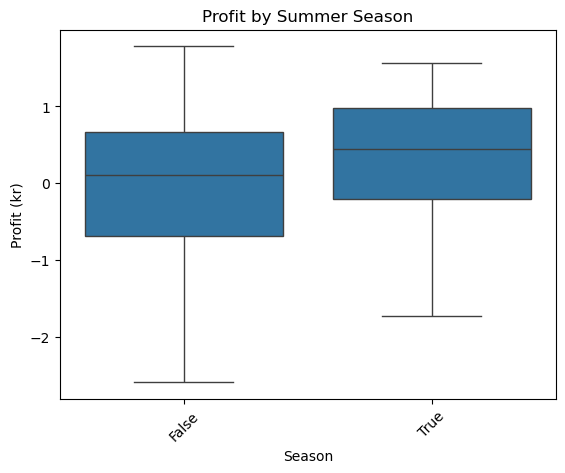

In [3]:
sns.boxplot(x='season_availability_Summer', y='profit_kr', data=df)
plt.title('Profit by Summer Season')
plt.xlabel('Season')
plt.ylabel('Profit (kr)')
plt.xticks(rotation=45)
plt.show()

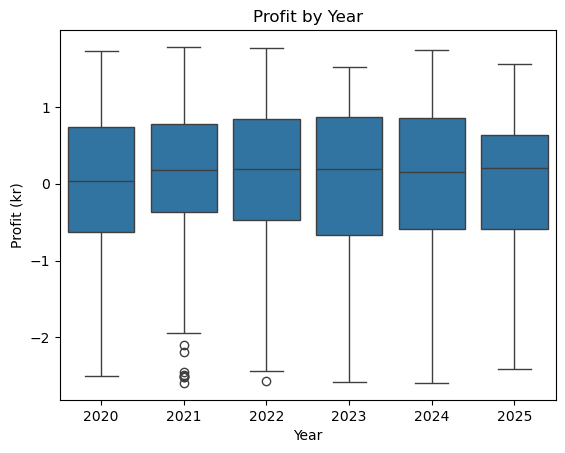

In [4]:
sns.boxplot(x='year', y='profit_kr', data=df)
plt.title('Profit by Year')
plt.xlabel('Year')
plt.ylabel('Profit (kr)')
plt.show()

#####  <span style="color:#1E824C"> Price vs Weight and Freight </span>

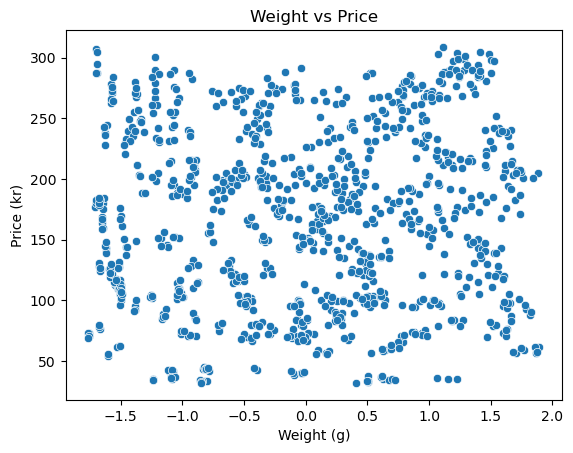

In [5]:
fig, ax = plt.subplots()
sns.scatterplot(x='weight_g', y='price_kr', data=df)
plt.title('Weight vs Price')
plt.xlabel('Weight (g)')
plt.ylabel('Price (kr)')
fig.savefig("weight_vs_price.png", bbox_inches="tight")

plt.show()

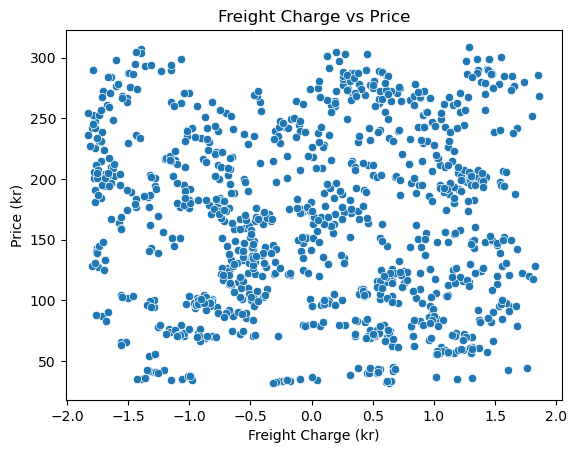

In [6]:
#fig, ax = plt.subplots()
sns.scatterplot(x='freight_charge_kr', y='price_kr', data=df)
plt.title('Freight Charge vs Price')
plt.xlabel('Freight Charge (kr)')
plt.ylabel('Price (kr)')
#fig.savefig("freight_vs_price.png", bbox_inches="tight")

plt.show()


#### <span style="color:#1E824C"> Choose Dependent and Independent Variables </span>

In [7]:

Y_price = df['price_kr'].values.reshape(-1, 1)
X_price = df[['cost_kr', 'weight_g', 'length_cm', 'freight_charge_kr',
              'season_availability_Summer','season_availability_Spring',
              'season_availability_Autumn', 'season_availability_Winter', 'year']]

In [8]:
Y_profit = df['profit_kr']
X_profit = df[['cost_kr', 'weight_g', 'length_cm', 'freight_charge_kr',
              'season_availability_Summer','season_availability_Spring',
              'season_availability_Autumn', 'season_availability_Winter', 'year']]


#### <span style="color:#1E824C">  Split the data </span>

In [9]:
X_train_price, X_test_price, y_train_price, y_test_price = train_test_split(X_price, Y_price, random_state=123, test_size=0.15) 

In [10]:
print(X_train_price.shape)
print(y_train_price.shape)
print(X_test_price.shape)
print(y_test_price.shape)

(844, 9)
(844, 1)
(150, 9)
(150, 1)


In [11]:
X_train_profit, X_test_profit, y_train_profit, y_test_profit = train_test_split(X_profit, Y_profit, test_size=0.15, random_state=123)

In [12]:
print(X_train_profit.shape)
print(X_test_profit.shape)
print(y_train_profit.shape)
print(y_test_profit.shape)

(844, 9)
(150, 9)
(844,)
(150,)


#### <span style="color:#1E824C">  Train the ML models </span>

In [13]:
price_model = LinearRegression()

In [14]:
price_model.fit(X_train_price, y_train_price)
price_model

LinearRegression()

In [15]:
a = price_model.coef_
b = price_model.intercept_

In [16]:
profit_model = LinearRegression()
profit_model.fit(X_train_profit, y_train_profit)

LinearRegression()

#### <span style="color:#1E824C">  Test the test models  </span>

In [17]:
a2 = profit_model.coef_
b2 = profit_model.intercept_

In [18]:
y_pred_price = price_model.predict(X_test_price)
print("Predicted prices:", y_pred_price[:5])

Predicted prices: [[209.99676046]
 [183.71232483]
 [142.01756623]
 [251.42480931]
 [126.25347794]]


In [19]:
y_pred_profit = profit_model.predict(X_test_profit)
print("Predicted profits:", y_pred_profit[:5])

Predicted profits: [-0.56235654  0.59830375  0.4956305  -1.09119854  1.03149514]


#### <span style="color:#1E824C">  Visualise the Linear Regressions  </span>

##### <span style="color:#1E824C">  Price Model  </span>

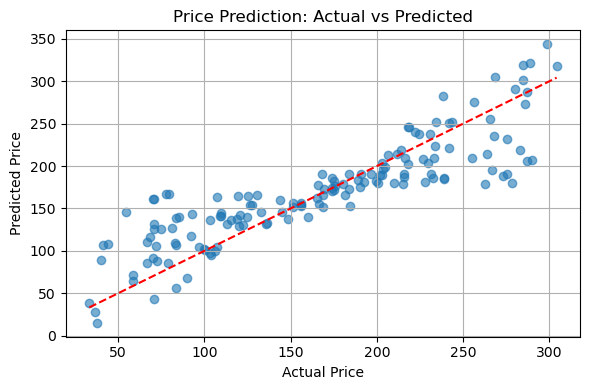

In [20]:
plt.figure(figsize=(6, 4))
plt.scatter(y_test_price, y_pred_price, alpha=0.6)
plt.plot([y_test_price.min(), y_test_price.max()],
         [y_test_price.min(), y_test_price.max()],
         color='red', linestyle='--')  # perfect prediction line
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Price Prediction: Actual vs Predicted')
plt.grid(True)
plt.tight_layout()
plt.show()

##### <span style="color:#1E824C">  Profit Model  </span>

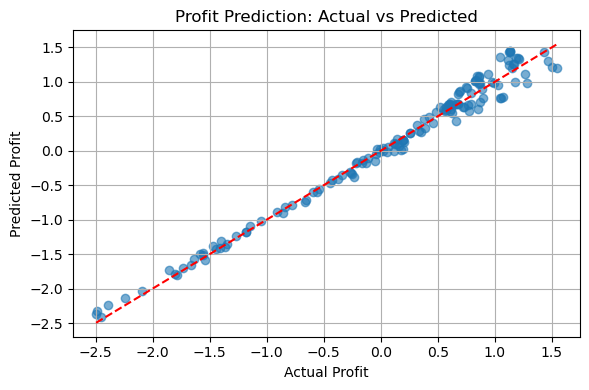

In [21]:
plt.figure(figsize=(6, 4))
plt.scatter(y_test_profit, y_pred_profit, alpha=0.6)
plt.plot([y_test_profit.min(), y_test_profit.max()],
         [y_test_profit.min(), y_test_profit.max()],
         color='red', linestyle='--')  # perfect prediction line
plt.xlabel('Actual Profit')
plt.ylabel('Predicted Profit')
plt.title('Profit Prediction: Actual vs Predicted')
plt.grid(True)
plt.tight_layout()
plt.show()

#### <span style="color:#1E824C">  Evaluate both models </span>

In [22]:
# MAE
mae_price = metrics.mean_absolute_error(y_test_price, y_pred_price)
print(mae_price)

26.563078126599986


In [23]:
# MAE
mae_profit = metrics.mean_absolute_error(y_test_profit, y_pred_profit)
print(mae_profit)

0.09262488926169192


In [24]:
# MSE
mse_price = metrics.mean_squared_error(y_test_price, y_pred_price)
print(mse_price)

1292.4507235147498


In [25]:
#MSE 
mse_profit = metrics.mean_squared_error(y_test_profit, y_pred_profit)
print(mse_profit)

0.01571493533568351


In [26]:
# RMSE
rmse_price = np.sqrt(metrics.mean_squared_error(y_test_price, y_pred_price))
print(rmse_price)

35.95067069631316


In [27]:
# RMSE
rmse_profit = np.sqrt(metrics.mean_squared_error(y_test_profit, y_pred_profit))
print(rmse_profit)

0.12535922517183773



#### <span style="color:#1E824C"> Calculate R² score </span>


##### <span style="color:#1E824C"> Price </span>

In [28]:
eV = round(sm.explained_variance_score(y_test_price, y_pred_price), 2)
print('Explained variance score ',eV )

Explained variance score  0.76


In [29]:
r2_score(y_test_price, y_pred_price)

0.7591062086454825


##### <span style="color:#1E824C"> Profit </span>

In [30]:
eV2 = round(sm.explained_variance_score(y_test_profit, y_pred_profit), 2)
print('Explained variance score ',eV2 )

Explained variance score  0.98


In [31]:
r2_score(y_test_profit, y_pred_profit)

0.9839621626902124

The R² score for the price model is 0.76, indicating that 76% of the variation in seafood prices can be explained by the model. 

In the profit model, the  R² is 0.98, showing a high level of predictive accuracy. This suggests that profit is highly influenced by the selected features, particularly cost and freight charges.

### <span style="color:#1E824C">Summary of Train, Test, and Evaluate the Models</span>
To predict seafood price and profit, I trained multiple Linear Regression models using selected features. After splitting the dataset into training and test sets, both models were trained and evaluated using standard metrics: MAE, MSE, RMSE, and R².

The price model had an RMSE of approximately 35.96, suggesting that predicted prices deviate from the actual prices by around 36 DKK on average. The model achieved an R² score of 0.76, meaning it explains 76% of the variation in seafood prices.

The profit model performed with an RMSE of 0.12, showing highly accurate predictions. It also achieved an R² score of 0.98, indicating that nearly all variation in profit is explained by the input features.

In [32]:
df.columns

Index(['price_kr', 'weight_g', 'length_cm', 'width_cm', 'height_cm', 'cost_kr',
       'year', 'freight_charge_kr', 'profit_kr', 'name_Aborre',
       'name_Blåmusling', 'name_Canadisk_hummer',
       'name_Dansk_10-armet_blæksprutte', 'name_Fjordreje', 'name_Fjæsing',
       'name_Flodkrebs', 'name_Gedde', 'name_Havkat', 'name_Havtaske',
       'name_Helleflynder', 'name_Helt', 'name_Hornfisk', 'name_Hvilling',
       'name_Ising', 'name_Jomfruhummer', 'name_Knude', 'name_Knurhane',
       'name_Kuller', 'name_Kulmule', 'name_Laks_vild', 'name_Lange',
       'name_Levende_norsk_kongekrabbe', 'name_Line_blåmusling', 'name_Lyssej',
       'name_Makrel', 'name_Multe', 'name_Mørksej', 'name_Nordsøreje',
       'name_Norske_kammusling_i_skal', 'name_Pighvar', 'name_Rødspætte',
       'name_Rødtunge', 'name_Sandart', 'name_Signalkrebs', 'name_Sild',
       'name_Skrubbe', 'name_Skærising', 'name_Slethvar', 'name_Smelt',
       'name_Sort_hummer', 'name_Stenbider', 'name_Torsk', 'name_Ørred'